<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DACS/blob/main/DTDA/roads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting around
## Building roads and going places

Graphs are great for thinking about much more than maps and antennas. In this module, we can work with graphs to represent road networks. 

Instead of our rectangular town, we shall now imagine a rectangular province. We shall place points that represent towns pseudorandomly (just like we placed restaurants or antennas before).

Each town will become a vertex in a graph.

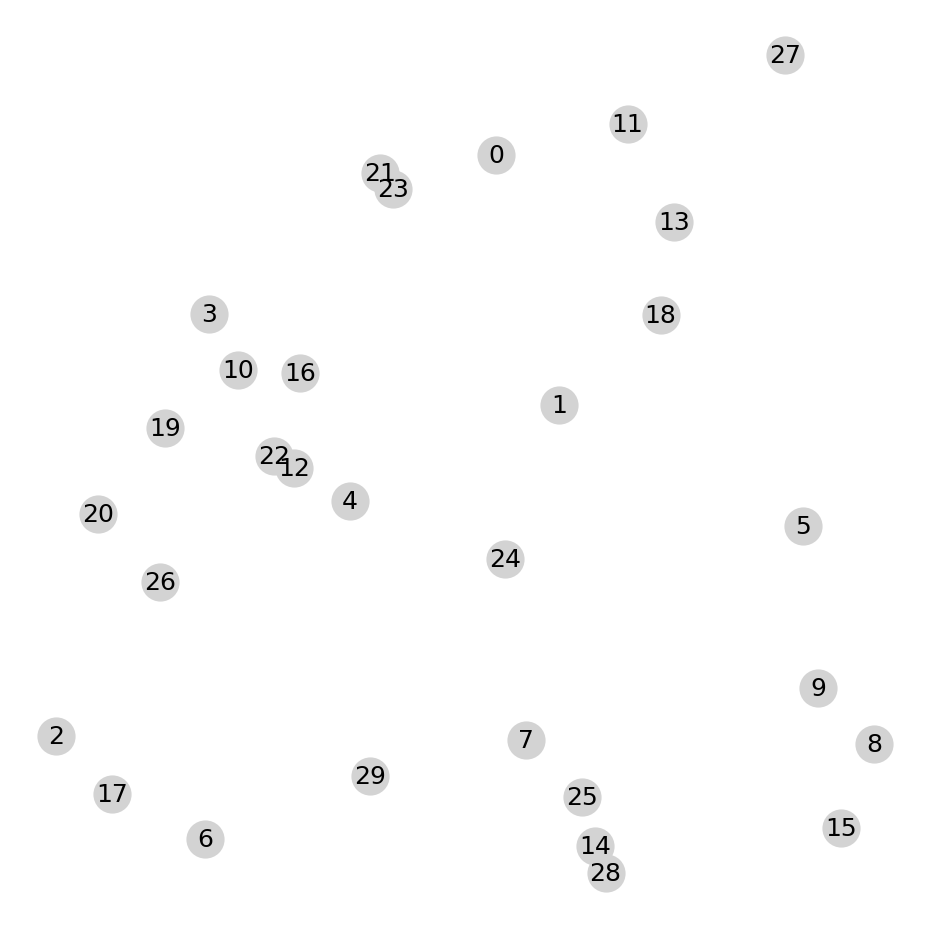

In [ ]:
import matplotlib.pyplot as plt
from random import random
import networkx as nx

t = 30 # how many towns
p = nx.Graph() # province

for i in range(t):
  x = random()
  y = random()
  p.add_node(i, pos = (x, y)) # call the towns 0, 1, 2, ...
  
coords = nx.get_node_attributes(p, 'pos')

fig = plt.figure(1, figsize = (6, 6), dpi =  150)
nx.draw(p, coords, node_color = 'lightgray')
l = nx.draw_networkx_labels(p, pos = coords)

For ground transport to become feasible, we need to build roads (or railroads) of some sort. Let us assume that our province is poor so we want to build the smallest possible total length of road but that every town needs to have at least one route to each other town, possibly passing through other towns on the way.

In graph theory, this is called a *minimum spanning tree* (MST). There are many different algorithms and we do not have to worry about the internal workings of any of them since the `networkx` library includes them. All we have to do is imagine that all towns are connected to one another, consider distance betwen the towns to be the the length of each edge (known as its *cost*), and then ask an MST algorithm to find the subset of connections (edges) that has the smallest total cost. 

This is a minimization problem. The objective is to minimize the total cost. The restriction is not to allow any *cycles* among the vertices.

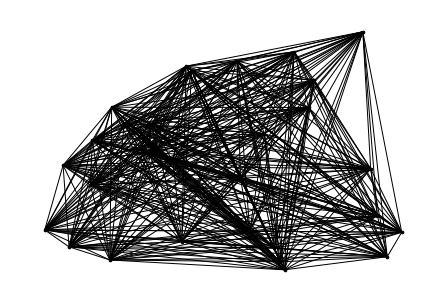

In [ ]:
from math import sqrt 

def distance(p1, p2):
  (x1, y1) = p1 
  (x2, y2) = p2
  return sqrt((x1 - x2)**2 + (y1 - y2)**2) 

for t1 in p.nodes:
  l1 = p.nodes[t1]['pos']
  for t2 in p.nodes:
    if t1 != t2:
      l2 = p.nodes[t2]['pos']
      cost = distance(l1, l2)
      p.add_edge(t1, t2, weight = cost)

nx.draw(p, coords, node_color = 'black', node_size = 7)

Those are **all** the possible roads. We do not want to build all those. So let us request the library for an MST.

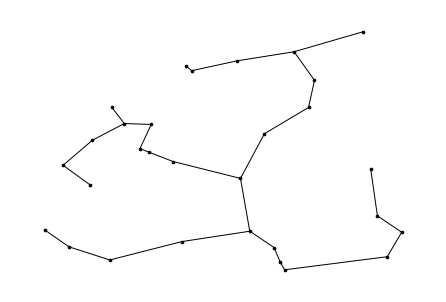

In [ ]:
r = nx.minimum_spanning_tree(p)
nx.draw(r, coords, node_color = 'black', node_size = 7)

That's much more realistic. Yet, real provinces tend to have **more** roads than this since people often want to go from the end of one "branch" to another. 

One way to add "convenient" roads would be to attempt to solve another famous problem from combinatorial optimization: the *travelling sales-person problem* (TSP).

Given a graph, find the cheapest possible *cycle* that visits each vertex **exactly once**. `networkx` also has many approximation algorithms for this problem. Let's find one such cycle.

In [ ]:
c = nx.approximation.traveling_salesman_problem(p)
print(c)

[0, 11, 27, 5, 9, 8, 15, 28, 14, 25, 7, 24, 29, 6, 17, 2, 26, 20, 19, 10, 3, 16, 22, 12, 4, 1, 18, 13, 21, 23, 0]


Some of the roads needed for this may already be built. Let's check and then build any additional ones. 

We can draw the roads that form part of the TSP cycle with a different color and a thicker line to highlight them.

A new road from 27 to 5 needs to be built for the TSP cycle
A new road from 24 to 29 needs to be built for the TSP cycle
A new road from 2 to 26 needs to be built for the TSP cycle
A new road from 3 to 16 needs to be built for the TSP cycle
A new road from 4 to 1 needs to be built for the TSP cycle
A new road from 13 to 21 needs to be built for the TSP cycle


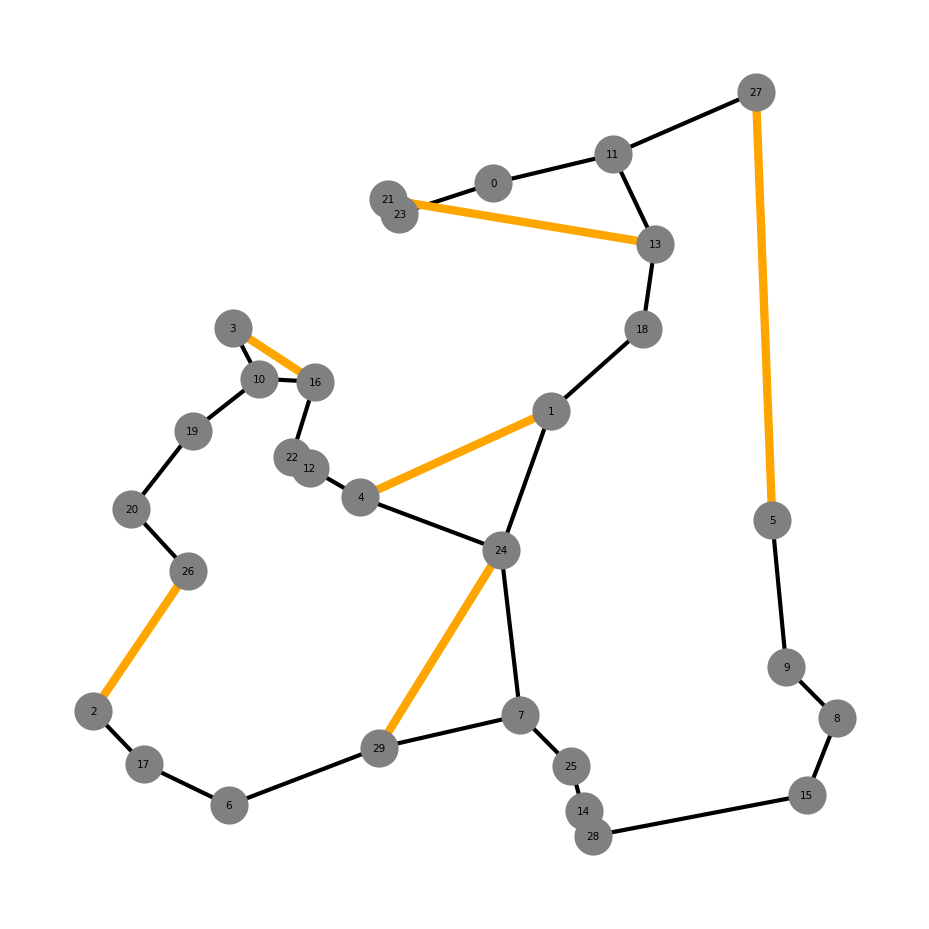

In [ ]:
source = c.pop(0) # first town to visit along the TSP cycle
while len(c) > 0:
  target = c.pop(0) # target of a road to check
  if source == target:
    break # cycle complete
  if not r.has_edge(source, target): # no such edge exists
    r.add_edge(source, target, color = 'orange', thickness = 4)
    print(f'A new road from {source} to {target} needs to be built for the TSP cycle')
  source = target # move along the cycle

E = r.edges()
co = [ r[u][v].get('color', 'black') for u, v in E ]
th = [ r[u][v].get('thickness', 2) for u, v in E ]

fig = plt.figure(1, figsize = (6, 6), dpi =  150)
nx.draw(r, coords,  node_color = 'gray', edge_color = co, width = th)
l = nx.draw_networkx_labels(r, pos = coords, font_size = 5)